In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/Masih/Desktop/bootcamp /Challenges/Challenge-5-/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/Masih/Desktop/bootcamp /Challenges/Challenge-5-/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results)


# Display the data table for preview

combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [3]:


# Identify duplicate mice based on Mouse ID and Timepoint
duplicate_mouse_ids = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

duplicate_mouse_ids


array(['g989'], dtype=object)

In [4]:
duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
print("Data for duplicate mouse ID:")
duplicate_data

Data for duplicate mouse ID:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID'])


cleaned_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [8]:
len(cleaned_data)

249

In [7]:


# Use groupby and summary statistical methods
summary_statistics = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_statistics.columns = [
    'Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance',
    'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.'
]

# Display the summary statistics DataFrame
print("Summary Statistics of Tumor Volume for Each Regimen:")
summary_statistics


Summary Statistics of Tumor Volume for Each Regimen:


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


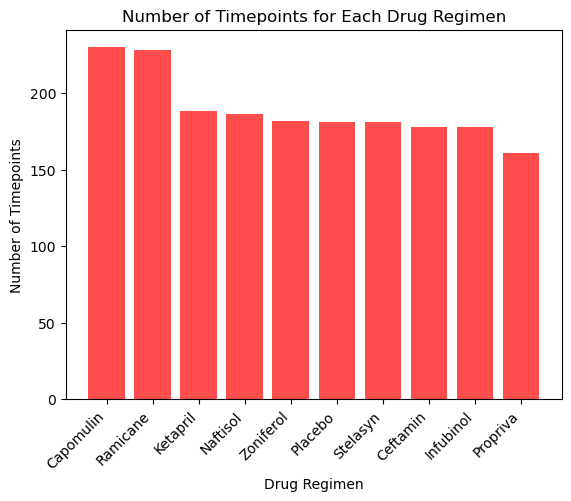

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot 
# Group data by 'Drug Regimen' and count the number of timepoints
timepoints_count = combined_data.groupby('Drug Regimen')['Timepoint'].count()

# Sort the timepoints_count in descending order
timepoints_count = timepoints_count.sort_values(ascending=False)

# Plotting the sorted bar chart
plt.bar(timepoints_count.index, timepoints_count.values, color='r', alpha=0.7, align="center")
plt.xticks(rotation=45, ha='right')

# Adding titles and labels
plt.title('Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

plt.show()




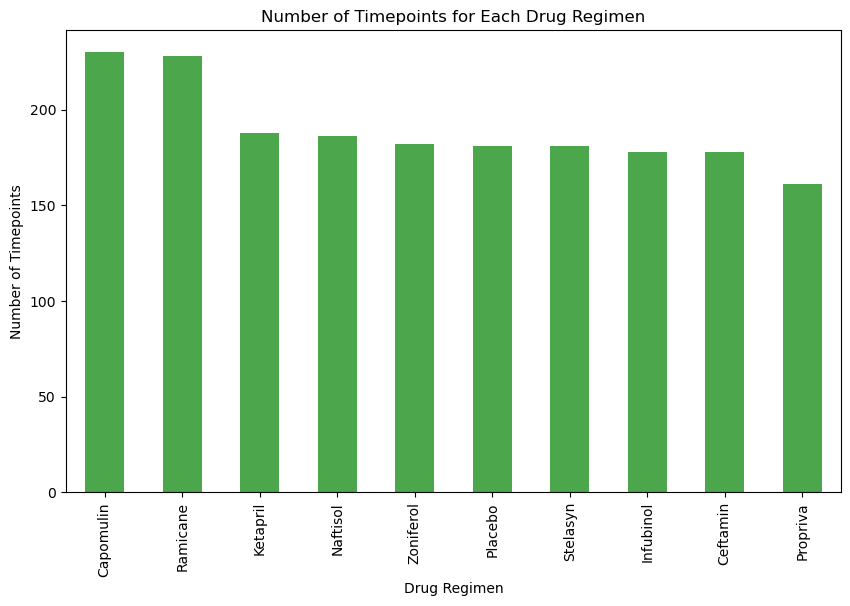

In [31]:
#Pandas

# Use value_counts to get the count of timepoints for each drug regimen
timepoints_count = combined_data['Drug Regimen'].value_counts()

# Sort the timepoints_count in descending order
timepoints_count = timepoints_count.sort_values(ascending=False)

# Plotting the sorted bar chart using pandas
timepoints_count.plot(kind='bar', color='g', alpha=0.7, figsize=(10, 6))

# Adding titles and labels
plt.title('Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

plt.show()


0       Male
1       Male
2       Male
3       Male
4       Male
        ... 
1888    Male
1889    Male
1890    Male
1891    Male
1892    Male
Name: Sex, Length: 1893, dtype: object

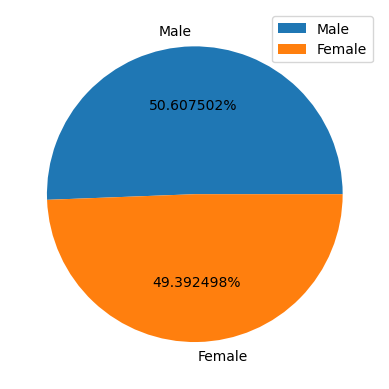

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = pd.Series(combined_data['Sex'])
pie.value_counts(normalize=True).plot.pie(autopct='%1f%%', ylabel='', legend=True)





# Show the plot
pie 






In [32]:
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


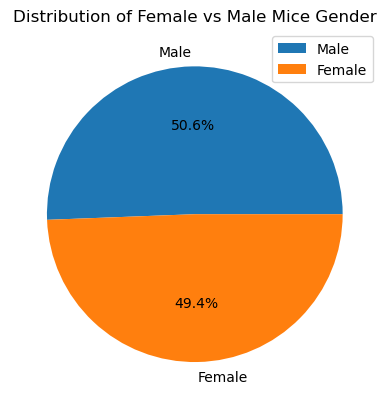

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = combined_data['Sex'].value_counts(normalize=True)
labels = counts.index
sizes = counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice Gender')
plt.legend()
plt.show()


In [54]:
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


# Create a grouped DataFrame that shows the last time point for each mouse
grouped_df = combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
merged_df = pd.merge(grouped_df, combined_data, on=['Mouse ID', 'Timepoint'], how='left')

# List of treatment names
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to hold tumor volume data
tumor_volume_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows corresponding to each treatment
    treatment_data = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # Append the final tumor volumes for each drug to the list
    tumor_volume_data.append(treatment_data)


Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


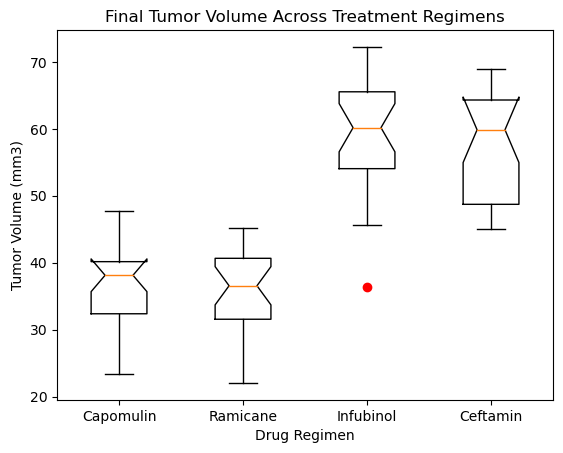

In [88]:

    

    # Calculate quartiles and IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    # Print results
    print(f"Outliers for {treatment}: {outliers}")

# Generate a box plot
plt.boxplot(tumor_volume_data, labels=treatments, notch=True, sym='ro')
plt.title('Final Tumor Volume Across Treatment Regimens')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()


In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse1 = combined_data['Mouse ID']

In [76]:
import plotly.express as px
combined_data.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


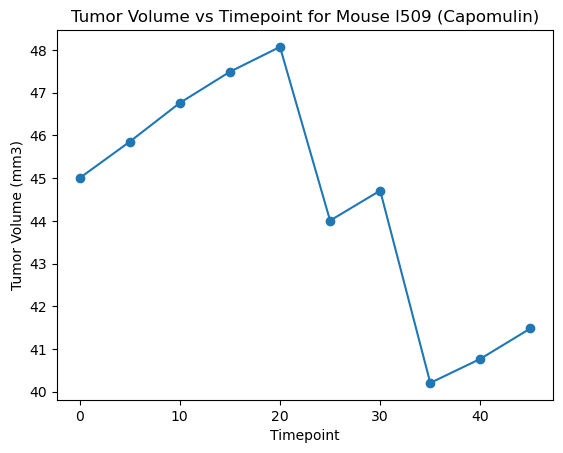

In [82]:


# Select mouse ID I509 treated with Capomulin
selected_mouse_data = combined_data[(combined_data['Drug Regimen'] == 'Capomulin') & (combined_data['Mouse ID'] == 'l509')]



# Sort the DataFrame by 'Timepoint' for better visualization
selected_mouse_data = selected_mouse_data.sort_values(by='Timepoint')

# Generate a line plot of tumor volume versus time point for the selected mouse
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume vs Timepoint for Mouse l509 (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


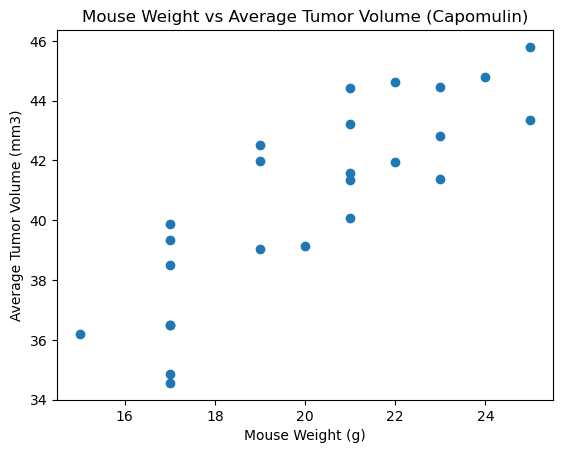

In [83]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Select data for the Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate average observed tumor volume and mouse weight
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate a scatter plot of mouse weight versus average observed tumor volume
plt.scatter(mouse_weight, average_tumor_volume, marker='o')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


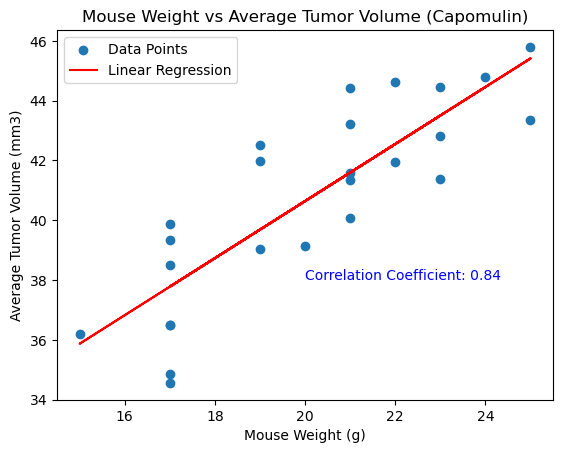

In [90]:

# Select data for the Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate average observed tumor volume and mouse weight
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation_coefficient = mouse_weight.corr(average_tumor_volume)

# Perform linear regression
regression_result = linregress(mouse_weight, average_tumor_volume)

# Extract slope and intercept from the result
slope = regression_result.slope
intercept = regression_result.intercept

# Generate a scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', label='Data Points')

# Plot the linear regression line
regress_values = slope * mouse_weight + intercept
plt.plot(mouse_weight, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display correlation coefficient on the plot
plt.text(20, 38, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='blue')


plt.legend()


plt.show()
